In [80]:
import pandas as pd
df = pd.read_csv('ST_train.csv')

In [81]:
PassengerId_transported_df = df[['PassengerId', 'Transported']].copy()
PassengerId_transported_df.shape

(8693, 2)

In [82]:
PassengerId_transported_df[['Group', 'PassengerNo']] = PassengerId_transported_df['PassengerId'].str.split('_', expand=True)
PassengerId_transported_df.head(15)

,PassengerId,Transported,Group,PassengerNo
0,0001_01,False,0001,01
1,0002_01,True,0002,01
2,0003_01,False,0003,01
3,0003_02,False,0003,02
4,0004_01,True,0004,01
5,0005_01,True,0005,01
6,0006_01,True,0006,01
7,0006_02,True,0006,02
8,0007_01,True,0007,01
9,0008_01,True,0008,01


In [83]:
group_counts = PassengerId_transported_df['Group'].value_counts()
PassengerId_transported_df['Group_size'] = PassengerId_transported_df['Group'].map(group_counts)
PassengerId_transported_df.head(15)

,PassengerId,Transported,Group,PassengerNo,Group_size
0,0001_01,False,0001,01,1
1,0002_01,True,0002,01,1
2,0003_01,False,0003,01,2
3,0003_02,False,0003,02,2
4,0004_01,True,0004,01,1
5,0005_01,True,0005,01,1
6,0006_01,True,0006,01,2
7,0006_02,True,0006,02,2
8,0007_01,True,0007,01,1
9,0008_01,True,0008,01,3


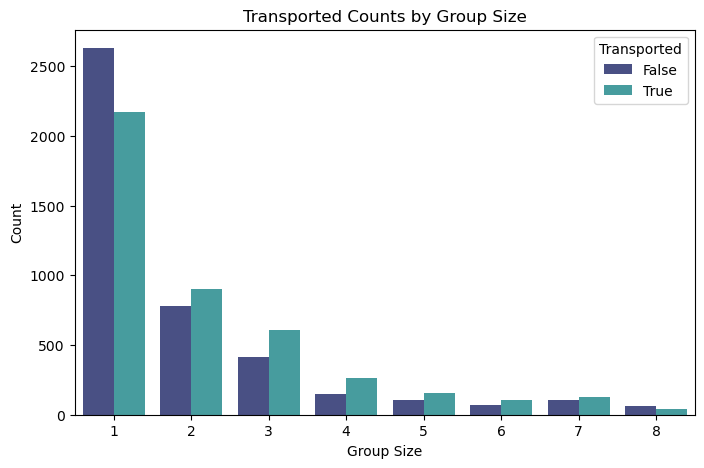

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
sns.countplot(x='Group_size', hue='Transported', data=PassengerId_transported_df, palette='mako')
plt.title('Transported Counts by Group Size')
plt.xlabel('Group Size')
plt.ylabel('Count')
plt.show()

In [84]:
correlation_matrix = PassengerId_transported_df[['Transported', 'Group', 'Group_size', 'PassengerNo']].corr()

print(correlation_matrix)

             Transported     Group  Group_size  PassengerNo
Transported     1.000000  0.021491    0.082644     0.066390
Group           0.021491  1.000000    0.014753     0.011170
Group_size      0.082644  0.014753    1.000000     0.757107
PassengerNo     0.066390  0.011170    0.757107     1.000000


In [95]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Label encode categorical columns
PassengerId_transported_df['Transported_Encoded'] = le.fit_transform(PassengerId_transported_df['Transported'])
PassengerId_transported_df['Group_Encoded'] = le.fit_transform(PassengerId_transported_df['Group'])
PassengerId_transported_df['PassengerNo_Encoded'] = le.fit_transform(PassengerId_transported_df['PassengerNo'])

# Prepare data for MI calculation
X = PassengerId_transported_df[['Group_Encoded', 'Group_size', 'PassengerNo_Encoded']]
y = PassengerId_transported_df['Transported_Encoded']

# Calculate mutual information
mi_scores = mutual_info_classif(X, y, discrete_features=[True, False, True])

# Create a Series to view the mutual information scores
mi_series = pd.Series(mi_scores, index=['Group', 'Group_size', 'PassengerNo'])

print(mi_series)

Group          0.512914
Group_size     0.017335
PassengerNo    0.004350
dtype: float64


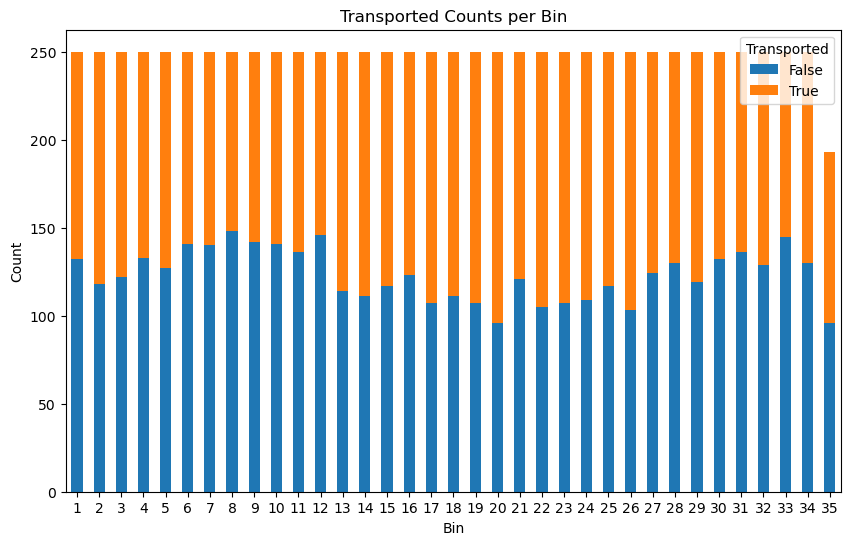

In [86]:
import matplotlib.pyplot as plt
# Create bins
bin_size = 250
PassengerId_transported_df['Bin'] = (PassengerId_transported_df.index // bin_size) + 1

# Group by bins and calculate the counts of 'Transported'
transported_counts = PassengerId_transported_df.groupby('Bin')['Transported'].value_counts().unstack(fill_value=0)

# Plotting
transported_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Bin')
plt.ylabel('Count')
plt.title('Transported Counts per Bin')
plt.xticks(rotation=0)
plt.show()